<a href="https://colab.research.google.com/github/Sim-mi-gyeong/DataAnalysis/blob/main/TermProject04_Korea's_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 각각의 csv파일을 불러와 df20__ 값에 저장
df2017=pd.read_csv('/content/drive/MyDrive/dataset/2017.csv')
df2018=pd.read_csv('/content/drive/MyDrive/dataset/2018.csv')
df2019=pd.read_csv('/content/drive/MyDrive/dataset/2019.csv')
df2020=pd.read_csv('/content/drive/MyDrive/dataset/2020.csv')
df2021=pd.read_csv('/content/drive/MyDrive/dataset/2021.csv')

In [4]:
# 2018년 데이터 중 결측값을 해당 column의 평균값으로 대체
df2018['Perceptions of corruption']=df2018['Perceptions of corruption'].fillna(df2018['Perceptions of corruption'].mean())

In [5]:
df2018.isnull().sum()

Country                         0
Regional indicator              0
Score                           0
GDP per capita                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [10]:
# 각 연도별 DataFrame에 해당 연도에 따른 Year Column 추가
df2017['Year']=2017
df2018['Year']=2018
df2019['Year']=2019
df2020['Year']=2020
df2021['Year']=2021

# 5개년 DataFrame 병합
df=df2017.append([df2018, df2019, df2020, df2021])
df

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Afghanistan,South Asia,3.794,0.401477,0.180747,0.106180,0.311871,0.061158,2017
1,Albania,Central and Eastern Europe,4.644,0.996193,0.731160,0.381499,0.201313,0.039864,2017
2,Algeria,Middle East and North Africa,5.872,1.091864,0.617585,0.233336,0.069437,0.146096,2017
3,Argentina,Latin America and Caribbean,6.599,1.185295,0.695137,0.494519,0.109457,0.059740,2017
4,Armenia,Commonwealth of Independent States,4.376,0.900597,0.637524,0.198303,0.083488,0.026674,2017
...,...,...,...,...,...,...,...,...,...
138,Venezuela,Latin America and Caribbean,4.892,0.852000,0.574000,0.615000,-0.169000,0.827000,2021
139,Vietnam,Southeast Asia,5.411,0.817000,0.616000,0.940000,-0.098000,0.796000,2021
140,Yemen,Middle East and North Africa,3.658,0.329000,0.272000,0.602000,-0.147000,0.800000,2021
141,Zambia,Sub-Saharan Africa,4.073,0.528000,0.231000,0.782000,0.061000,0.823000,2021


In [11]:
# 전체 국가 중 한국의 row를 추출하여 df_Korea에 저장
df_Korea=df[df['Country']=='South Korea']
df_Korea

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
118,South Korea,East Asia,5.8380,1.401678,0.900214,0.257922,0.206674,0.063283,2017
118,South Korea,East Asia,5.8750,1.266000,0.955000,0.244000,0.175000,0.051000,2018
118,South Korea,East Asia,5.8950,1.301000,1.036000,0.159000,0.175000,0.056000,2019
118,South Korea,East Asia,5.8724,5.785993,0.799387,0.736027,0.612965,-0.043404,2020
118,South Korea,East Asia,5.8450,1.403000,0.801000,0.672000,-0.083000,0.727000,2021


In [13]:
# 연도별 전체 국가의 column별 평균을 mean20__에 저장

mean2017=df2017.iloc[:,:-1].mean()
mean2017

mean2018=df2018.iloc[:,:-1].mean()
mean2018

mean2019=df2019.iloc[:,:-1].mean()
mean2019

mean2020=df2020.iloc[:,:-1].mean()
mean2020

mean2021=df2021.iloc[:,:-1].mean()
mean2021

Score                           5.562350
GDP per capita                  0.985329
Healthy life expectancy         0.527126
Freedom to make life choices    0.793993
Generosity                     -0.019308
Perceptions of corruption       0.725643
dtype: float64

In [15]:
# 연도별 전체 국가의 column별 평균을 df_mean이라는 DataFrame으로 병합

df_mean=pd.DataFrame(data=[mean2017, mean2018, mean2019, mean2020, mean2021])
df_mean['Year']=[2017, 2018, 2019, 2020, 2021]
df_mean

,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,5.413126,1.005134,0.568586,0.416165,0.243110,0.122225,2017
1,5.442455,0.912294,0.616189,0.461629,0.177580,0.112106,2018
2,5.486741,0.932098,0.749392,0.398147,0.180203,0.110042,2019
3,5.538580,5.437659,0.816179,0.649455,0.788641,-0.019410,2020
4,5.562350,0.985329,0.527126,0.793993,-0.019308,0.725643,2021


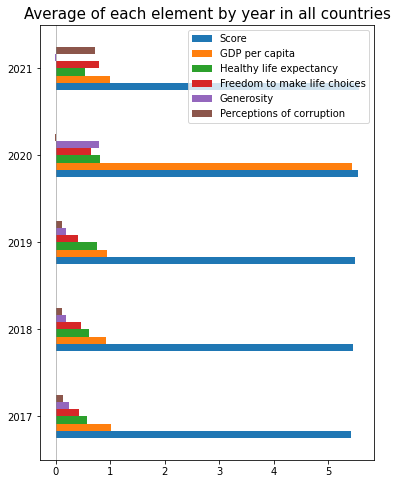

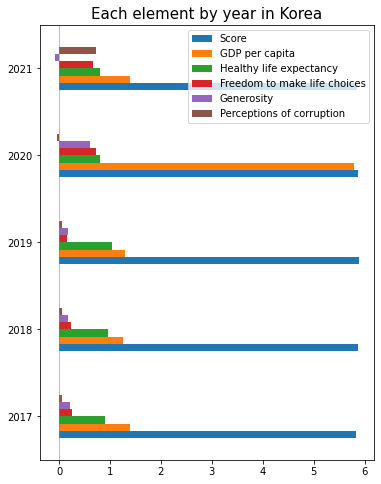

In [16]:
labels=[2017,2018,2019,2020,2021]
# [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]

ax=df_mean.drop('Year', axis=1).plot.barh(rot=0)
ax.set_yticklabels(labels)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.axvline(0, color='gray', linewidth=.5)
fig = plt.gcf()
fig.set_size_inches(6,8)
plt.title('Average of each element by year in all countries', fontsize=15)

ax=df_Korea.drop('Year', axis=1).plot.barh(rot=0)
ax.set_yticklabels(labels)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.axvline(0, color='gray', linewidth=.5)
fig = plt.gcf()
fig.set_size_inches(6,8)
plt.title('Each element by year in Korea', fontsize=15)

# ax=df_Korea.drop('Year', axis=1).plot.barh(rot=0)

plt.show()


In [ ]:
# df_Korea=df_Korea.drop(['Year'], axis=1)
df_Korea=df_Korea.drop(['Regional indicator'], axis=1)
df_Korea=df_Korea.drop(['Country'], axis=1)
df_Korea

,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
118,5.8380,1.401678,0.900214,0.257922,0.206674,0.063283,2017
118,5.8750,1.266000,0.955000,0.244000,0.175000,0.051000,2018
118,5.8950,1.301000,1.036000,0.159000,0.175000,0.056000,2019
118,5.8724,5.785993,0.799387,0.736027,0.612965,-0.043404,2020
118,5.8450,1.403000,0.801000,0.672000,-0.083000,0.727000,2021


In [ ]:
col_list=['Score', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
col_list

['Score',
 'GDP per capita',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [ ]:
# diff: df_Korea의 각 항목 값과 df_mean의 차이

diff=(df_Korea.iloc[:,:-1].values)-(df_mean.iloc[:, :-1].values)
diff

array([[ 0.42487395,  0.39654461,  0.33162846, -0.15824325, -0.03643608,
        -0.05894255],
       [ 0.43254545,  0.35370629,  0.33881119, -0.21762937, -0.00258042,
        -0.06110563],
       [ 0.40825874,  0.3689021 ,  0.28660839, -0.23914685, -0.0052028 ,
        -0.05404196],
       [ 0.33381939,  0.34833449, -0.01679135,  0.08657259, -0.17567542,
        -0.02399403],
       [ 0.28265035,  0.41767133,  0.27387413, -0.12199301, -0.06369231,
         0.00135664]])

In [ ]:
# diff에 대한 DataFrame 만들기

df_diff=pd.DataFrame(data=diff, index=[2017, 2018,2019, 2020, 2021], columns=col_list)
#df_diff['Year']=[2017,2018,2019,2020,2021]
df_diff

,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
2017,0.424874,0.396545,0.331628,-0.158243,-0.036436,-0.058943
2018,0.432545,0.353706,0.338811,-0.217629,-0.002580,-0.061106
2019,0.408259,0.368902,0.286608,-0.239147,-0.005203,-0.054042
2020,0.333819,0.348334,-0.016791,0.086573,-0.175675,-0.023994
2021,0.282650,0.417671,0.273874,-0.121993,-0.063692,0.001357


Text(0.5, 1.0, 'All Country and Korea difference of elements each year ')

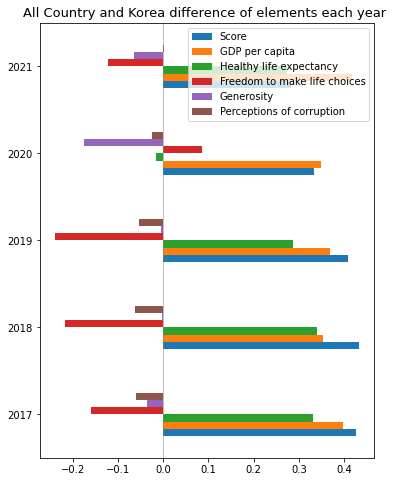

In [ ]:
# df_diff: df_Korea의 각 항목 값과 df_mean의 차이
# df_diff: 한국과 전세계 각 요소의 연간 평균 차이

ax=df_diff.plot.barh(rot=0)
ax.set_yticklabels(labels)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.axvline(0, color='gray', linewidth=.5)
fig = plt.gcf()
fig.set_size_inches(6,8)
plt.title('All Country and Korea difference of elements each year ', fontsize=13)

Text(0.5, 1.0, 'All Country and Korea difference of elements each year ')

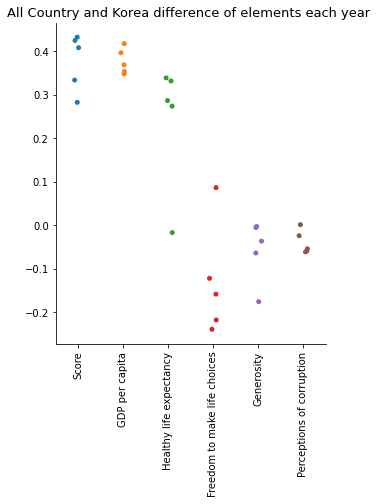

In [ ]:
# 연도에 따른 각 요소별 한국-전세계 차이에 대한 scatter 분포

sns.catplot(data=df_diff)
plt.xticks(rotation='vertical')
plt.title('All Country and Korea difference of elements each year ', fontsize=13)